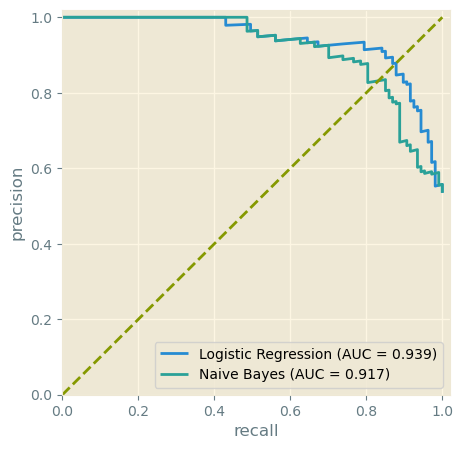

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers = [(LogisticRegression(), "Logistic Regression"), (GaussianNB(), "Naive Bayes")]

plt.figure(figsize=(5, 5))
with plt.style.context('Solarize_Light2'):
    for clf, lab in classifiers:
        clf.fit(X_train, y_train)
        y_scores = clf.predict_proba(X_test)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
        auc_score = auc(recall, precision)
        plt.plot(recall, precision, label=f'{lab} (AUC = {auc_score:.3f})')

    plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), '--')

    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.xlim([0,1.02])
    plt.ylim([0,1.02])
    plt.legend()
    plt.savefig('pr-curve.svg')
    plt.show()